<h1 align='center' style="font-family:Tahoma"><b>Banking Dataset - Marketing Targets</b></h1>

<p style="font-family:Tahoma;font-size:18px">Deposito berjangka merupakan sumber pendapatan utama bagi sebuah bank. Deposito berjangka adalah investasi tunai yang diadakan di lembaga keuangan. Uang Anda diinvestasikan untuk tingkat bunga yang disepakati selama jangka waktu atau jangka waktu tertentu. Kampanye pemasaran melalui telepon masih tetap menjadi salah satu cara paling efektif untuk menjangkau orang-orang. Namun, mereka membutuhkan investasi besar menyewa pusat call center untuk benar-benar menjalankan kampanye ini. Oleh karena itu, sangat penting untuk mengidentifikasi pelanggan yang paling mungkin berkonversi terlebih dahulu sehingga mereka dapat ditargetkan secara khusus melalui panggilan. Data tersebut terkait dengan kampanye pemasaran langsung (panggilan telepon) dari lembaga perbankan Portugis.<b> Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan deposito berjangka (variabel subscribed)</b></p>

<ul style="font-family:Tahoma;font-size:18px">
    <li><code>ID</code> - ID client</li>
    <li><code>age</code> - umur client</li>
    <li><code>job</code> - tipe pekerjaan</li>
    <li><code>marital</code> - status pernikahan</li>
    <li><code>education</code> - jenjang pendidikan</li>
    <li><code>default</code> - memiliki kartu kredit?</li>
    <li><code>balance</code> - memiliki uang dalam akun bank?</li>
    <li><code>housing</code> - memiliki sewa/cicilan rumah?</li>
    <li><code>loan</code> - memiliki cicilan pribadi?</li>
    <li><code>contact</code> - jenis komunikasi kontak</li>
    <li><code>month</code> - bulan terakhir di kontak dalam kurun waktu tahun</li>
    <li><code>day</code> - hari terakhir di kontak dalam kurun waktu seminggu</li>
    <li><code>duration</code> - durasi kontak terakhir, dalam detik</li>
    <li><code>campaign</code> - jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini</li>
    <li><code>pdays</code> - jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya</li>
    <li><code>previous</code> - jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini</li>
    <li><code>poutcomes</code> - hasil dari kampanye pemasaran sebelumnya</li>
    <li><code>subscribed</code> - apakah klien sudah berlangganan deposito berjangka?</li>
</ul>

<h2 style="font-family:Tahoma"><b>Fathurrahman Syarief</b> | Data Mining <br><br>Data Science Technology
Airlangga University</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')

class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"

<h1 style="font-family:Tahoma;font-weight:bold">Read Dataset</h1>

In [2]:
# read dataset
def read_banking_data(filepath) -> pd.DataFrame:
    data = pd.read_csv(filepath, delimiter=';')\
        .rename(columns={'y':'subscribed'})

    data = data[data['age'] != 'age']

    numeric = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']
    for att in numeric:
        data[att] = pd.to_numeric(data[att])

    return data


df = read_banking_data(filepath='https://raw.githubusercontent.com/fathur-rs/Dataset/main/banking-dataset-marketing-targets.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 49732
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   contact     49732 non-null  object
 9   day         49732 non-null  int64 
 10  month       49732 non-null  object
 11  duration    49732 non-null  int64 
 12  campaign    49732 non-null  int64 
 13  pdays       49732 non-null  int64 
 14  previous    49732 non-null  int64 
 15  poutcome    49732 non-null  object
 16  subscribed  49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


<h1 style="font-family:Tahoma;font-weight:bold"> Missing Value</h1>

<AxesSubplot:>

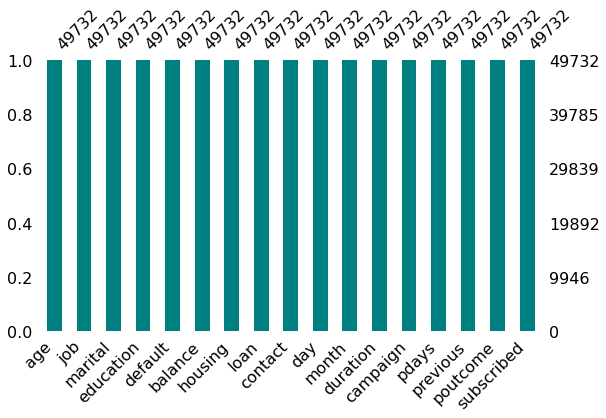

In [4]:
msno.bar(df, figsize=(9,5), color=Colors.Teal)

> <p style="font-size:18px;font-family:Tahoma;"> Semua plot batang terisi penuh yang menunjukkan tidak ada missing value.</p>

<h1 style="font-family:Tahoma;font-weight:bold">Handling Outlier</h1>

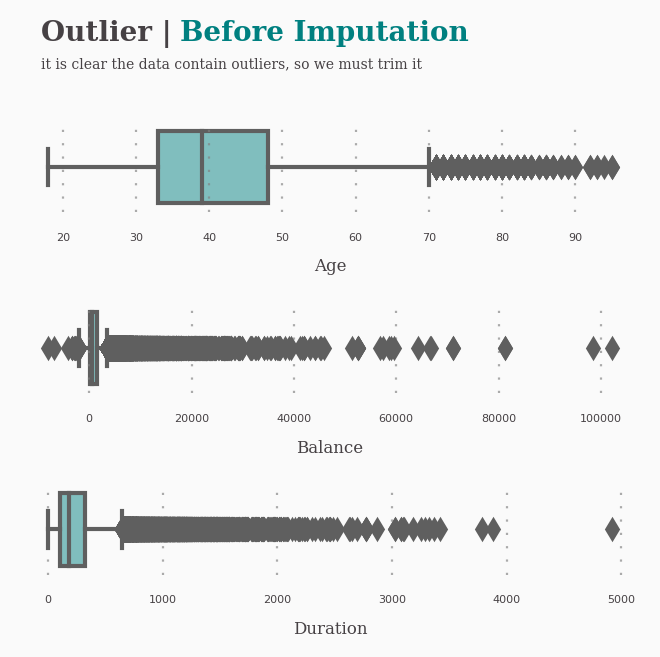

In [5]:
# setting up canvas
fig = plt.figure(figsize=(4, 3), dpi=200, facecolor=Colors.LightGray)
gs = fig.add_gridspec(3, 1, hspace=1)

# aalignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[ax, 0])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(
        axis="x", labelsize=4, bottom=False, labelcolor=Colors.DarkGray
    )
    locals()["axis" + str(ax)].xaxis.set_label_coords(0, -0.5)

    spines = ["top", "left", "right", "bottom"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)

# plot 1 - 3 -> before imputing
for ax, col in zip(range(0, 3), ["age", "balance", "duration"]):
    sns.boxplot(data=df, x=col, ax=locals()["axis" + str(ax)], color=Colors.Aquamarine)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=6, color=Colors.DarkGray
    )

# Text
axis0.text(
    17,
    -1.4,
    "Outlier |",
    fontweight="bold",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
axis0.text(
    36,
    -1.4,
    "Before Imputation",
    fontweight="bold",
    fontfamily="serif",
    fontsize=10,
    color=Colors.Teal,
)
axis0.text(
    17,
    -1.1,
    "it is clear the data contain outliers, so we must trim it",
    fontweight="normal",
    fontfamily="serif",
    fontsize=5,
    color=Colors.DarkGray,
)

fig.show()


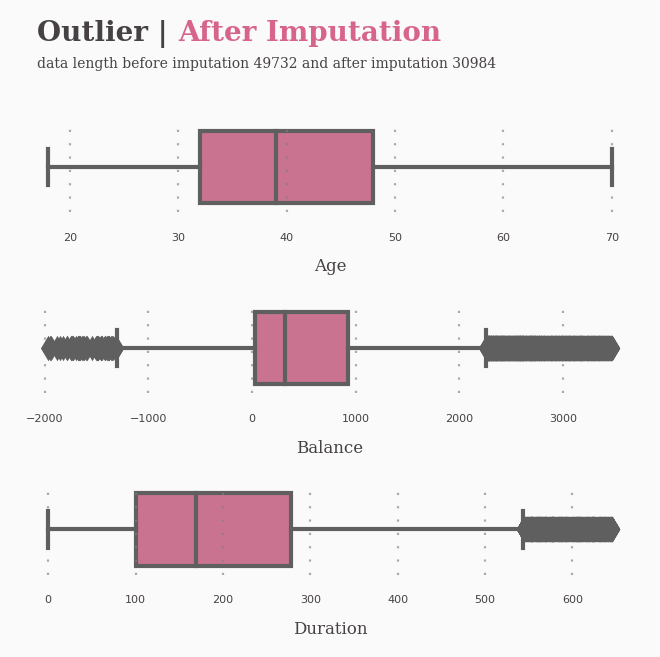

In [6]:
# subset outliers function
def handling_outlier() -> pd.DataFrame:
    cols = [
        "age",
        "balance",
        "duration",
        "day",
        "duration",
        "campaign",
        "pdays",
        "previous",
    ]
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    return df2


df2 = handling_outlier()

# setting up canvas
fig = plt.figure(figsize=(4, 3), dpi=200, facecolor=Colors.LightGray)
gs = fig.add_gridspec(3, 1, hspace=1)

# aalignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[ax, 0])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(
        axis="x", labelsize=4, bottom=False, labelcolor=Colors.DarkGray
    )
    locals()["axis" + str(ax)].xaxis.set_label_coords(0, -0.5)

    spines = ["top", "left", "right", "bottom"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)

# plot 1 - 3 -> before imputing
for ax, col in zip(range(0, 3), ["age", "balance", "duration"]):
    sns.boxplot(data=df2, x=col, ax=locals()["axis" + str(ax)], color=Colors.HotPink)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=6, color=Colors.DarkGray
    )

# Text
axis0.text(17,-1.4,"Outlier |",fontweight="bold",fontfamily="serif",fontsize=10,color=Colors.DarkGray,)
axis0.text(30,-1.4,"After Imputation",fontweight="bold",fontfamily="serif",fontsize=10,color=Colors.HotPink,)
axis0.text(17,-1.1,f"data length before imputation {len(df)} and after imputation {len(df2)}",fontweight="normal",fontfamily="serif",fontsize=5,color=Colors.DarkGray,)

fig.show()


> <p style="font-size:18px;font-family:Tahoma;"> Boxplot di atas merupakan visualisasi dari sebaran data yang diwakili oleh variabel Age, Balance, dan Duration. Dari hasil visualisasi diketahui bahwa data memiliki outlier. Untuk itu, lakukan imputasi outlier menggunakan teknik Upper Bound dan Lower Bound atau IQR. Dari hasil imputasi terlihat bahwa sebagian besar outlier telah terhapus.</p>

<h1 style="font-family:Tahoma;font-weight:bold"> Data Visualisasi</h1>

In [7]:
# Data Prep

def data_prep(*var_name, dataframe) -> pd.DataFrame:
    data = dataframe.groupby([*var_name]).size().to_frame(name = 'count').reset_index()
    data['percentage'] = data['count'].apply(lambda x: x / sum(data['count']) * 100)
    
    return data

* <h2 style="font-family:Tahoma">Numeric Variable</h2>

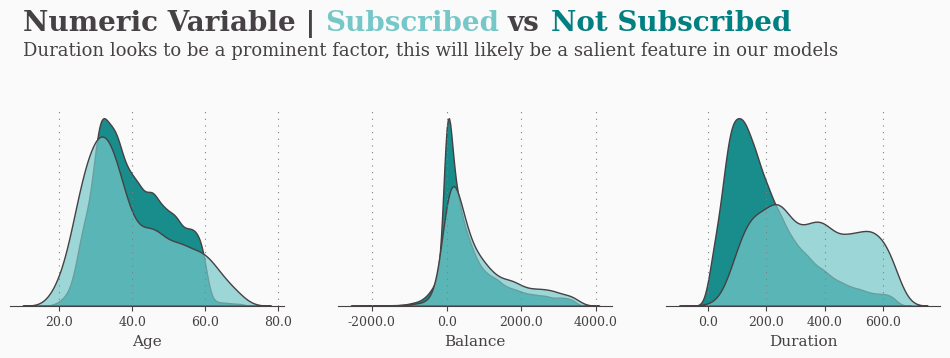

In [8]:
# data
no_subs = df2.query("subscribed == 'no'")
yes_subs = df2.query("subscribed == 'yes'")

fig = plt.figure(figsize=(12,12), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4,3)



for ax,col in enumerate(range(0, 3)):
    locals()["ax"+str(ax)] = fig.add_subplot(gs[0, col])
    locals()["ax"+str(ax)].set_facecolor(Colors.LightGray)
    locals()["ax"+str(ax)].tick_params(axis='y', left=False)
    locals()["ax"+str(ax)].tick_params(axis='x', color=Colors.DarkGray)
    locals()["ax"+str(ax)].get_yaxis().set_visible(False)
    locals()["ax"+str(ax)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
    for s in ["top","right","left"]:
        locals()["ax"+str(ax)].spines[s].set_visible(False)
        locals()["ax"+str(ax)].spines['bottom'].set_color(Colors.DarkGray)

col = ['age', 'balance', 'duration']
for i,col in enumerate(col):
    sns.kdeplot(no_subs[col], ax=locals()['ax'+str(i)], shade=True, color=Colors.Teal, alpha=0.9, ec=Colors.DarkGray)
    sns.kdeplot(yes_subs[col], ax=locals()['ax'+str(i)], shade=True, color=Colors.Aquamarine, alpha=0.7, ec=Colors.DarkGray)
    locals()['ax'+str(i)].set_xlabel(col.title(), fontfamily='serif',fontsize=11, color=Colors.DarkGray)
    locals()['ax'+str(i)].set_xticklabels(labels=locals()['ax'+str(i)].get_xticks().tolist(), fontfamily='serif', fontsize=9, color=Colors.DarkGray)
    
# text
ax0.text(10,0.065, 'Numeric Variable |',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(93,0.065,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
ax0.text(143,0.065,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(155,0.065,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

ax0.text(10,0.059, 'Duration looks to be a prominent factor, this will likely be a salient feature in our models',fontfamily="serif",fontsize=13,fontweight="normal",color=Colors.DarkGray)

fig.show()

> <p style="font-size:18px;font-family:Tahoma;"> Age dan Balance terhadap subscribed (yes atau no) menunjukkan distribusi yang hampir identik. Hal ini menandakkan kedua variabel tersebut memiliki implikasi yang sama jika disandingkan terhadap variabel subscribed. Namun variabel Duration memiiliki distribusi yang berbeda, well hal ini jelas semakin lama durasi komunikasi menandakkan adanya ketertarikan kuat client untuk bergabung menjadi nasabah bank tersebut</p>

* <h2 style="font-family:Tahoma">Job Type</h2>

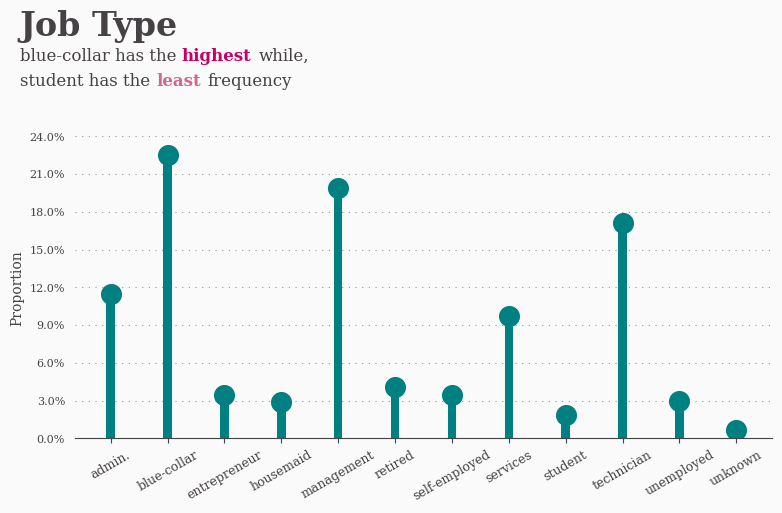

In [9]:
# data
job = data_prep('job', dataframe = df2 )

# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment -> axis
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="y", left=False, color=Colors.DarkGray)
ax0.tick_params(axis="x", color=Colors.DarkGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.65,
)

for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)

ax0.spines["bottom"].set_color(Colors.DarkGray)

# plotting
ax0.bar(job.job, height=job.percentage, zorder=3, color=Colors.Teal, width=0.15)
ax0.scatter(job.job, job.percentage, s=200, color=Colors.Teal)

# plot settings
ax0.set_xticklabels(
    labels=list(job.job),
    rotation=30,
    fontfamily="serif",
    fontsize=9,
    color=Colors.DarkGray,
)
ax0.set_yticklabels(
    ax0.get_yticks(), fontfamily="serif", fontsize=8, color=Colors.DarkGray
)

ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(3))

ax0.set_ylabel(
    "Proportion",
    fontfamily="serif", 
    fontsize=10, 
    color=Colors.DarkGray
)

ax0.yaxis.set_ticks(np.arange(0, 27, 3))


# text
ax0.text(-1.6,32,"Job Type",fontsize=24,fontfamily="serif",fontweight="bold",color=Colors.DarkGray,)

ax0.text(-1.6,30,"blue-collar has the",fontsize=12,fontfamily="serif",fontweight="normal",color=Colors.DarkGray,)
ax0.text(1.25,30,"highest",fontsize=12,fontfamily="serif",fontweight="bold",color=Colors.DeepPink,)
ax0.text(2.6,30,"while,",fontsize=12,fontfamily="serif",fontweight="normal",color=Colors.DarkGray,)

ax0.text(-1.6,28,"student has the",fontsize=12,fontfamily="serif",fontweight="normal",color=Colors.DarkGray,)
ax0.text(0.8,28,"least",fontsize=12,fontfamily="serif",fontweight="bold",color=Colors.HotPink,)
ax0.text(1.7,28,"frequency",fontsize=12,fontfamily="serif",fontweight="normal",color=Colors.DarkGray,)

fig.show()


> <p style="font-size:18px;font-family:Tahoma;">Bank cenderung menghubungi orang-orang dengan profil pekerjaan profesional seperti kerah biru, manajemen, dan teknisi. "unknown" tidak dipilih sebagai frekuensi terkecil, karena merupakan data noise dan akan dilakukan imputasi data</p>

* <h2 style="font-family:Tahoma">Month</h2>

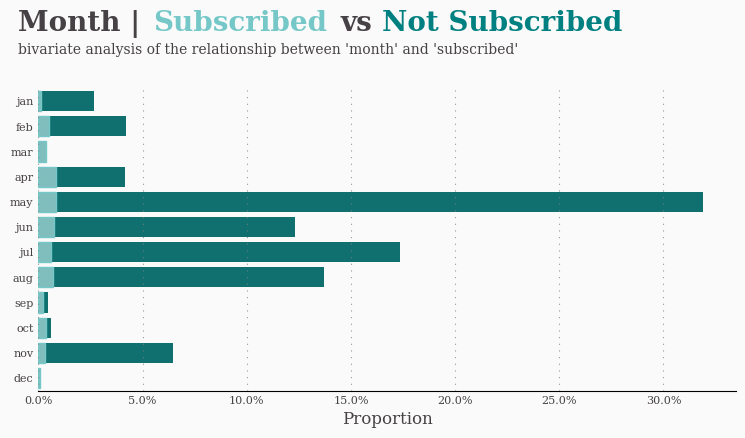

In [10]:
# data 
lst = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

month = data_prep('month', 'subscribed', dataframe = df2)
no_subs = month.query("subscribed == 'no'").set_index('month').loc[lst].reset_index()
yes_subs = month.query("subscribed == 'yes'").set_index('month').loc[lst].reset_index()

# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.grid(
    which="major",
    axis="x",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
for x in ['top', 'left', 'right']:
    ax0.spines[x].set_visible(False)

# plot
sns.barplot(x="percentage", y="month", data=no_subs, color=Colors.Teal, ax=ax0, zorder=0)
sns.barplot(x="percentage", y="month", data=yes_subs, color=Colors.Aquamarine, ax=ax0, ec=Colors.Aquamarine)

# plot setting
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(5))
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("Proportion", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_ylabel("")

# text
ax0.text(-1, -2.8, 'Month |',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(5.5, -2.8, 'Subscribed',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine)
ax0.text(14.5, -2.8, 'vs',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(16.5, -2.8, 'Not Subscribed',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal)

ax0.text(-1, -1.9, "bivariate analysis of the relationship between 'month' and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray,)

fig.show()

> <p style="font-size:18px;font-family:Tahoma;">Bulan Mei memiliki lebih banyak pelanggan dari bulan-bulan lainnya. Terlepas dari berapa banyak orang yang dihubungiin, rata-rata berlangganan hampir sama kecuali bulan Desember dan Januari. Selain itu, penyebaran data "yes" atau subscribed yang ditandai oleh warna biru muda menunjukkan distribusi yang proporsional, fitur "month" akan dihapus karena tidak mempengaruhi hasil</p>

* <h2 style="font-family:Tahoma">Education</h2>

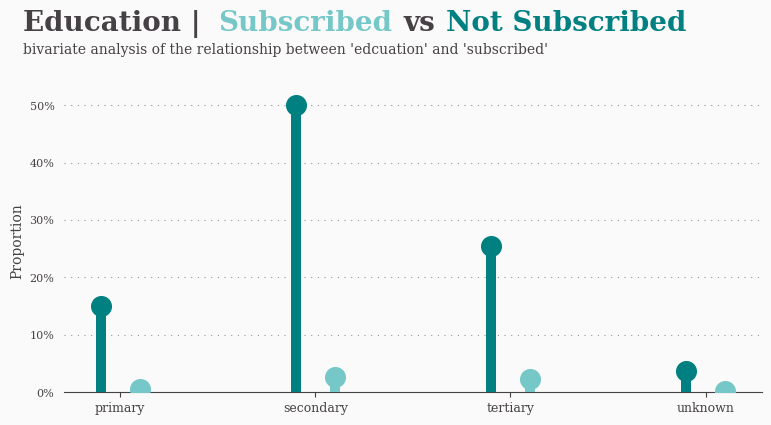

In [11]:
# data 
contact = data_prep('education', 'subscribed', dataframe = df2)
positive = contact.query("subscribed == 'yes'")
negative = contact.query("subscribed == 'no'")

# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment -> axis
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="y", left=False, color=Colors.DarkGray)
ax0.tick_params(axis="x", color=Colors.DarkGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.65,
)

for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)

ax0.spines["bottom"].set_color(Colors.DarkGray)

# plotting
ax0.bar(negative.education, height=negative["percentage"], zorder=3, color=Colors.Teal, width=0.05)
ax0.scatter(negative.education, negative["percentage"], zorder=3,s=200, color=Colors.Teal)
ax0.bar(np.arange(len(positive.education))+0.2, height=positive["percentage"], zorder=3, color=Colors.Aquamarine, width=0.05)
ax0.scatter(np.arange(len(positive.education))+0.2, positive["percentage"], zorder=3,s=200, color=Colors.Aquamarine)

ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(positive.education))+0.2 / 2)
ax0.set_xticklabels(list(positive.education),rotation=0)

# plot settings
# plot settings
ax0.set_xticklabels(
    labels=list(positive.education),
    rotation=0,
    fontfamily="serif",
    fontsize=9,
    color=Colors.DarkGray,
)
ax0.set_yticklabels(
    ax0.get_yticks(), fontfamily="serif", fontsize=8, color=Colors.DarkGray
)

ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(3))

ax0.set_ylabel(
    "Proportion",
    fontfamily="serif", 
    fontsize=10, 
    color=Colors.DarkGray
)

ax0.yaxis.set_ticks(np.arange(0, 60, 10))
ax0.text(-0.4, 63, 'Education |', fontsize=20, fontweight='bold', fontfamily='serif', color=Colors.DarkGray)
ax0.text(0.6, 63, 'Subscribed', fontsize=20, fontweight='bold', fontfamily='serif', color=Colors.Aquamarine)
ax0.text(1.55, 63, 'vs', fontsize=20, fontweight='bold', fontfamily='serif', color=Colors.DarkGray)
ax0.text(1.77, 63, 'Not Subscribed', fontsize=20, fontweight='bold', fontfamily='serif', color=Colors.Teal)
ax0.text(-0.4,59,"bivariate analysis of the relationship between 'edcuation' and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray,)



fig.show()

> <p style="font-size:18px;font-family:Tahoma;"> Client dengan tingkat pendidikan yang lebih tinggi cenderung mengikut langganan deposito. Efek mayoritas, mungkin karena pihak bank  cenderung mengkontak orang dengan pendidikan lebih tinggi.</p>

* <h2 style="font-family:Tahoma">Marital Status</h2>

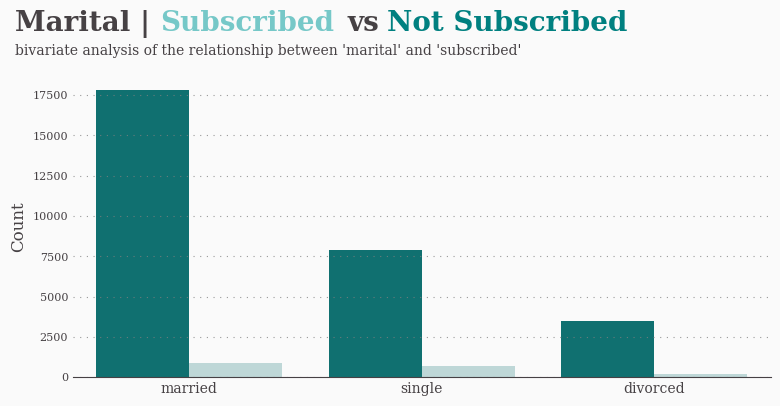

In [12]:
# plot
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment -> axis
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.tick_params(axis="both", which="both", length=0)
ax0.set_xlabel("")
ax0.set_ylabel("")
for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)

# plot
sns.countplot(
    data=df2,
    x="marital",
    hue="subscribed",
    palette=[Colors.Teal, Colors.LightCyan],
    ax=ax0,
)

# plot setting
ax0.get_legend().remove()
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2500))
ax0.set_xticklabels(
    labels=list(df2["marital"].unique()),
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("")
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)

# text
ax0.text(-0.75,21500,"Marital |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(-0.125,21500,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
ax0.text(0.68,21500,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(0.85,21500,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)
ax0.text(-0.75,20000,"bivariate analysis of the relationship between 'marital' and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray,)

fig.show()


> <p style="font-size:18px;font-family:Tahoma;"> Bank lebih terarik pada orang yang sudah menikah dan lajang daripada yang bercerai. Acceptance rate terbesar terdapat pada client yang sudah menikah dan lajang 
.</p>

* <h2 style="font-family:Tahoma">Contact</h2>

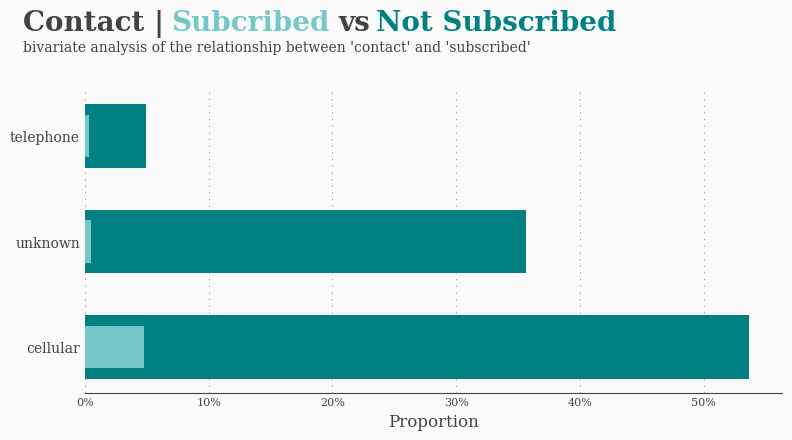

In [13]:
# data
data = data_prep('contact', 'subscribed', dataframe = df2)
positive = data.query("subscribed == 'yes'").sort_values(by='percentage', ascending=False)
negative = data.query("subscribed == 'no'").sort_values(by='percentage', ascending=False)

# plot
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(Colors.LightGray)
ax0.grid(
    which="major",
    axis="x",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.tick_params(axis="both", which="both", length=0)
ax0.set_xlabel("")
ax0.set_ylabel("")
for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)


# plot
ax0.barh(
    negative.contact,
    negative.percentage,
    color=Colors.Teal,
    zorder=3,
    height=0.6
)
ax0.barh(
    positive.contact,
    positive.percentage,
    color=Colors.Aquamarine,
    zorder=3,
    height=0.4
)

# plot setting
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(10))
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=10)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("Proportion", fontfamily="serif", fontsize=12, color=Colors.DarkGray)

# text
ax0.text(-5,3,"Contact |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(7,3,"Subcribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine)
ax0.text(20.5,3,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(23.5,3,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal)
ax0.text(-5,2.8,"bivariate analysis of the relationship between 'contact' and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray)

fig.show()


> <p style="font-size:18px;font-family:Tahoma;"> Grafik menunjukkan bahwa orang yang dihubungi melalui seluler lebih banyak berlangganan deposito</p>

* <h2 style="font-family:Tahoma">Binary Data<h2>

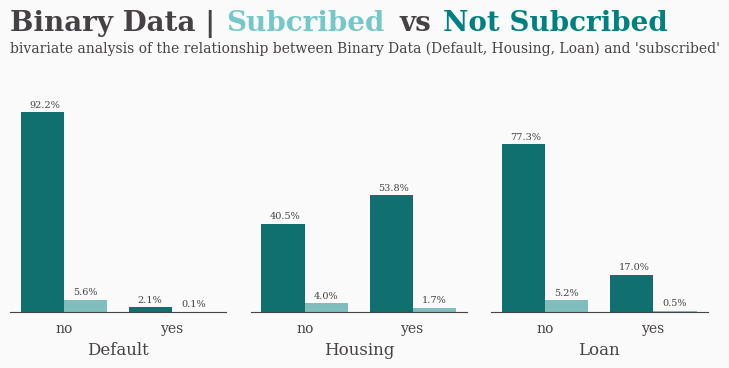

In [14]:
# data default
default = data_prep('default', 'subscribed', dataframe = df2)

# data housing
housing = data_prep('housing', 'subscribed', dataframe = df2)

# data loan
loan = data_prep('loan', 'subscribed', dataframe = df2)

# setup canvas
fig = plt.figure(figsize=(9, 6), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4, 6, wspace=0.25)

# aalignment
left = 0
right = 2
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[0:2, left:right])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="y",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="x", bottom=False)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()['axis'+str(ax)].get_yaxis().set_visible(False)
    spines = ["top", "left", "right"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)
        locals()["axis" + str(ax)].spines["bottom"].set_color(Colors.DarkGray)

    left += 2
    right += 2

# plot
for ax, data in zip(range(3), [default, housing, loan]):
    sns.barplot(data=data, x=data.columns[0], y='percentage', hue='subscribed',ax=locals()['axis'+str(ax)], palette=[Colors.Teal, Colors.Aquamarine])
    locals()['axis'+str(ax)].yaxis.set_major_formatter(mtick.PercentFormatter())
    locals()['axis'+str(ax)].yaxis.set_major_locator(mtick.MultipleLocator(10))
    locals()['axis'+str(ax)].yaxis.set_ticks(np.arange(0, 110, 10))
    locals()['axis'+str(ax)].get_legend().remove()
    locals()['axis'+str(ax)].set_xticklabels(labels=['no', 'yes'],fontfamily="serif",fontsize=10,color=Colors.DarkGray,)
    locals()['axis'+str(ax)].set_xlabel(data.columns[0].title(),fontfamily="serif",fontsize=12,color=Colors.DarkGray,)
    for p in locals()['axis'+str(ax)].patches:
        locals()['axis'+str(ax)].annotate(f'{round(p.get_height(), 1)}%', (p.get_x()+0.08, p.get_height()+2.5), fontsize=7,fontweight='normal', fontfamily='serif', color=Colors.DarkGray)


# text
axis0.text(-0.5,130,"Binary Data |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
axis0.text(-0.5,120,"bivariate analysis of the relationship between Binary Data (Default, Housing, Loan) and 'subscribed'",fontfamily="serif",fontsize=10,fontweight="normal",color=Colors.DarkGray)
axis0.text(1.5,130,"Subcribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine)
axis0.text(3.5,130,"Not Subcribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal)
axis0.text(3.1,130,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)

fig.show()


> <p style="font-size:18px;font-family:Tahoma;"> Proporsi yang tinggi dari non-default sesuai dengan total penerima deposito berjangka. Tampaknya masuk akal bahwa orang-orang dengan kredit tidak ingin berlangganan bank baru.</p>

> <p style="font-size:18px;font-family:Tahoma;"> Terdapat lebih banyak orang dengan pinajaman perumahan. Orang-orang tanpa pinjaman perumahan berada dalam proporsi yang lebih tinggi yang memutuskan untuk berlangganan deposito</p>

> <p style="font-size:18px;font-family:Tahoma;"> Begitu juga dengan Loan. Client yang tidak memiliki pinjaman pribadi cenderung bersedia menerima tawaran deposito. Namun, sedikit sekali proporsi client yang memiliki pinjaman pribadi memutuskan untuk berlangganan </p>


* <h2 style="font-family:Tahoma">Subscribed</h2>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 23.4 MB/s eta 0:00:00


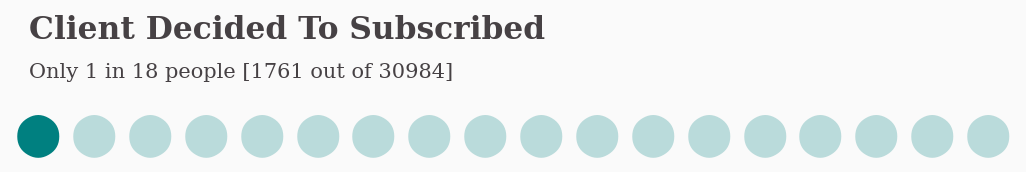

In [15]:
!pip install pywaffle
from pywaffle import Waffle

# data
subs = data_prep('subscribed', dataframe = df2)
subs = subs.sort_index()
# print(subs)

# plot
fig = plt.figure(
    figsize=(7, 2),
    dpi=150,
    facecolor=Colors.LightGray,
    FigureClass=Waffle,
    rows=1,
    values=[1, 17],
    colors=[Colors.Teal, Colors.LightCyan],
    characters="⬤",
    font_size=20,
    vertical=True,
)

# text
fig.text(
    0.035,
    0.78,
    "Client Decided To Subscribed",
    fontfamily="serif",
    fontsize=15,
    fontweight="bold",
    color=Colors.DarkGray,
)
fig.text(
    0.035,
    0.65,
    f"Only 1 in 18 people [1761 out of {len(df2)}]",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)

fig.show()


> <p style="font-size:18px;font-family:Tahoma;"> Didapati penyebaran atribut variabel target tidak seimbang, hal ini dapat mengakibatkan performa model menjadi bias. Untuk itu perlu melakukan proses SMOTING atau oversampling.</p>

<h1 style="font-family:Tahoma;font-weight:bold"> Data Prep</h1>

* <h2 style="font-family:Tahoma">Replace 'unknown' value with Mode value </h2>

In [16]:
col_names = ['job', 'education', 'contact']

for col in col_names:
    print(f'Before | {col} = {df2[col].unique()}')
    df2[col].replace(['unknown'], df2[col].mode(), inplace=True)
    print(f'After | {col} = {df2[col].unique()}\n')

Before | job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
After | job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Before | education = ['tertiary' 'secondary' 'unknown' 'primary']
After | education = ['tertiary' 'secondary' 'primary']

Before | contact = ['unknown' 'cellular' 'telephone']
After | contact = ['cellular' 'telephone']



* <h2 style="font-family:Tahoma">Drop unrepresentative featues </h2>

In [17]:
df2.drop(columns = ['month', 'previous', 'day', 'pdays', 'poutcome'], inplace = True)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,subscribed
0,58,management,married,tertiary,no,2143,yes,no,cellular,261,1,no
1,44,technician,single,secondary,no,29,yes,no,cellular,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,76,1,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,92,1,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,198,1,no


* <h2 style="font-family:Tahoma">Encoding categorical features</h2>

In [18]:
from sklearn.preprocessing import LabelEncoder

class Encoding:
    def __init__(self, data: pd.DataFrame):
        self.dataframe = data
        self.data = None
    
    def encoding_binary_data(self, binary_data: list):
        for col in binary_data:
            if col == 'contact':
                self.dataframe[col] = self.dataframe[col].map({
                    'telephone': 1,
                    'cellular' : 0
                })

            else:
                self.dataframe[col] = self.dataframe[col].map({
                    'yes': 1,
                    'no' : 0
                })
        
        self.data = self.dataframe
        return self
    
    def encoding_nonbinary_data(self, var: list):
        for col in var:
            self.dataframe[col] = LabelEncoder().fit_transform(self.dataframe[col])
        
        self.data = self.dataframe
        return self
    
    def fetch(self) -> pd.DataFrame:
        return self.data
    
encoding = Encoding(data = df2)\
    .encoding_binary_data(['default', 'housing', 'loan', 'contact'])\
    .encoding_nonbinary_data(['job', 'marital', 'education','subscribed'])

In [19]:
df2 = encoding.fetch()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,subscribed
0,58,4,1,2,0,2143,1,0,0,261,1,0
1,44,9,2,1,0,29,1,0,0,151,1,0
2,33,2,1,1,0,2,1,1,0,76,1,0
3,47,1,1,1,0,1506,1,0,0,92,1,0
4,33,1,2,1,0,1,0,0,0,198,1,0


<h1 style="font-family:Tahoma;font-weight:bold"> Modelling</h1>

* <h2 style="font-family:Tahoma">Train-Test Split</h2>

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score

x = df2.drop('subscribed', axis = 1)
y = df2.loc[:, 'subscribed']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

* <h2 style="font-family:Tahoma">Handling Imbalanced Features</h2>

In [21]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state = 1)
X_train_oversampling, y_train_oversampling = oversampling.fit_resample(X_train, y_train)

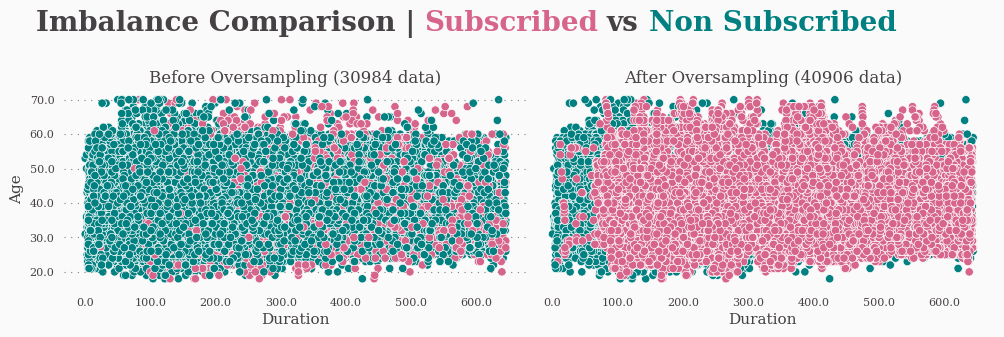

In [22]:
#data
# after smote
after_smote_df2 = pd.concat([X_train_oversampling, y_train_oversampling], axis=1)

fig = plt.figure(figsize=(12,12), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4,2, wspace=0.01)


for ax,col in enumerate(range(0, 2)):
    locals()["ax"+str(ax)] = fig.add_subplot(gs[0, col])
    locals()["ax"+str(ax)].set_facecolor(Colors.LightGray)
    locals()["ax"+str(ax)].tick_params(axis='y', left=False)
    locals()["ax"+str(ax)].tick_params(axis='x', bottom=False, color=Colors.DarkGray)
    locals()["ax"+str(ax)].get_yaxis().set_visible(True)
    locals()["ax"+str(ax)].grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,5))
    for s in ["top","right","left",'bottom']:
        locals()["ax"+str(ax)].spines[s].set_visible(False)

color_palette = [Colors.Teal, Colors.HotPink]

sns.scatterplot(data=df2, x='duration', y='age', hue='subscribed', ax=ax0, palette=color_palette).set_title(f"Before Oversampling ({len(df2.subscribed)} data)", fontsize=12, fontfamily='serif', color=Colors.DarkGray)
sns.scatterplot(data=after_smote_df2, x='duration', y='age', hue='subscribed', ax=ax1, palette=color_palette).set_title(f"After Oversampling ({len(after_smote_df2.subscribed)} data)", fontsize=12, fontfamily='serif', color=Colors.DarkGray)

for ax in range(2):
    locals()['ax'+str(ax)].get_legend().remove()
    locals()['ax'+str(ax)].set_xlabel("Duration", fontfamily='serif',fontsize=11, color=Colors.DarkGray)
    locals()['ax'+str(ax)].set_ylabel("Age", fontfamily='serif',fontsize=11, color=Colors.DarkGray)
    locals()['ax'+str(ax)].set_xticklabels(labels=ax0.get_xticks().tolist(), fontfamily='serif', fontsize=8, color=Colors.DarkGray)
    locals()['ax'+str(ax)].set_yticklabels(labels=ax0.get_yticks().tolist(), fontfamily='serif', fontsize=8, color=Colors.DarkGray)
    
ax1.get_yaxis().set_visible(False)

ax0.text(-75,90, 'Imbalance Comparison |',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
ax0.text(520,90,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.HotPink,)
ax0.text(800,90,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(865,90,"Non Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

fig.show()

* <h2 style="font-family:Tahoma">Logistic Regression</h2>

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg_params = {"penalty": ['l1', 'l2'],
            "C":[0.001,0.01,0.1,1,10,100]}

gcv_logreg = GridSearchCV(LogisticRegression(random_state=1), 
                   param_grid = logreg_params, 
                   cv = 10, 
                   scoring = 'f1')


logreg_gcv = gcv_logreg.fit(X_train_oversampling, y_train_oversampling)
print(f'Best Parameter: {logreg_gcv.best_params_}')
print(f'Best Score: {logreg_gcv.best_score_}')

Best Parameter: {'C': 0.01, 'penalty': 'l2'}
Best Score: 0.8248175334991276


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

logreg_pred = logreg_gcv.best_estimator_.predict(X_test)

print(classification_report(y_test, logreg_pred))
print('Accuracy Score: ',accuracy_score(y_test,logreg_pred))
print(f'F1 Score: {f1_score(y_test,logreg_pred)}')

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8770
           1       0.19      0.71      0.30       526

    accuracy                           0.81      9296
   macro avg       0.58      0.76      0.59      9296
weighted avg       0.93      0.81      0.86      9296

Accuracy Score:  0.8117469879518072
F1 Score: 0.2983159582999198


* <h2 style="font-family:Tahoma">Naive Bayes</h2>

In [25]:
from sklearn.naive_bayes import GaussianNB

nb_params = {"var_smoothing": np.logspace(0, -9, num = 100)}

gcv_nb = GridSearchCV(GaussianNB(), 
                   param_grid = nb_params, 
                   cv = 10, 
                   scoring = 'f1')


nb_gcv = gcv_nb.fit(X_train_oversampling, y_train_oversampling)
print(f'Best Parameter: {nb_gcv.best_params_}')
print(f'Best Score: {nb_gcv.best_score_}')

Best Parameter: {'var_smoothing': 1.232846739442066e-07}
Best Score: 0.8224396515760523


In [26]:
nb_pred = nb_gcv.best_estimator_.predict(X_test)

print(classification_report(y_test, nb_pred))
print('Accuracy Score: ',accuracy_score(y_test,nb_pred))
print(f'F1 Score: {f1_score(y_test,nb_pred)}\n')

              precision    recall  f1-score   support

           0       0.98      0.68      0.80      8770
           1       0.12      0.74      0.21       526

    accuracy                           0.69      9296
   macro avg       0.55      0.71      0.51      9296
weighted avg       0.93      0.69      0.77      9296

Accuracy Score:  0.6865318416523236
F1 Score: 0.21158008658008656



* <h2 style="font-family:Tahoma">Decision Tree</h2>

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {"criterion": ['gini', 'entropy'],
            "max_depth": np.arange(3, 15)}

gcv_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                   param_grid = dt_params, 
                   cv = 10, 
                   scoring = 'f1')


dt_gcv = gcv_dt.fit(X_train_oversampling, y_train_oversampling)
print(f'Best Parameter: {dt_gcv.best_params_}')
print(f'Best Score: {dt_gcv.best_score_}')

Best Parameter: {'criterion': 'gini', 'max_depth': 14}
Best Score: 0.9045331036655396


In [28]:
dt_pred = dt_gcv.best_estimator_.predict(X_test)
print(classification_report(y_test, dt_pred))
print('Accuracy Score: ',accuracy_score(y_test,dt_pred))
print(f'F1 Score: {f1_score(y_test,dt_pred)}\n')

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      8770
           1       0.19      0.51      0.27       526

    accuracy                           0.85      9296
   macro avg       0.58      0.69      0.59      9296
weighted avg       0.92      0.85      0.88      9296

Accuracy Score:  0.8450946643717728
F1 Score: 0.2719919110212336



* <h2 style="font-family:Tahoma">Confussion Matrix</h2>

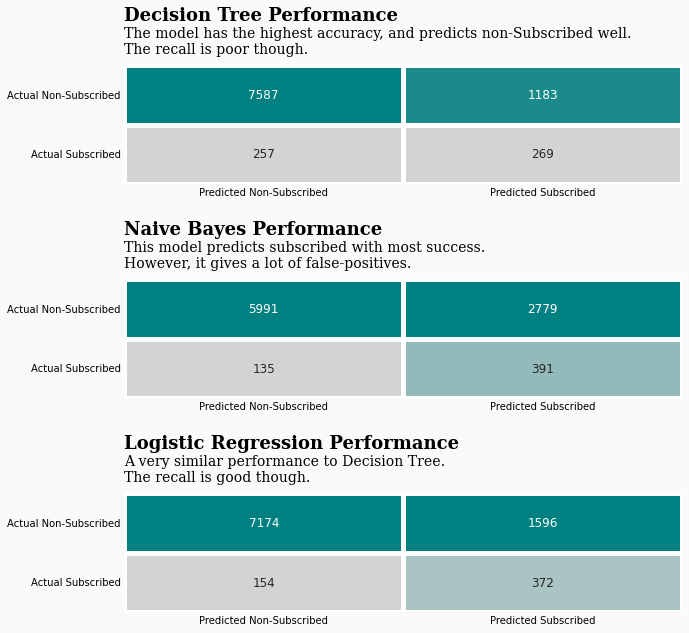

In [29]:
import matplotlib

colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(10,14), facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(4, 2, wspace=0.1, hspace=0.8)

for ax in range(3):
    locals()['ax'+str(ax)] = fig.add_subplot(gs[ax, :])
    locals()['ax'+str(ax)].set_facecolor(Colors.LightGray)
    locals()['ax'+str(ax)].tick_params(axis=u'both', which=u'both',length=0)


# decision tree
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

# naive bayes
nb_cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(nb_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

# logistiic regression
logreg_cm = confusion_matrix(y_test, logreg_pred)
sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})


# test
ax0.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.2,'The model has the highest accuracy, and predicts non-Subscribed well.\nThe recall is poor though.',fontsize=14,fontfamily='serif')

ax1.text(0,-0.75,'Naive Bayes Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax1.text(0,-0.2,'This model predicts subscribed with most success.\nHowever, it gives a lot of false-positives.',fontsize=14,fontfamily='serif')

ax2.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax2.text(0,-0.2,'A very similar performance to Decision Tree.\nThe recall is good though.',fontsize=14,fontfamily='serif')

fig.show()

* <h2 style="font-family:Tahoma">Model Comparison</h2>

In [30]:
# Make dataframes to plot
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()
    
    accuracy = (tp+tn) / (tn + tp + fn + fp)
    sensitivity = tp / (fn + tp) 
    specificity = tn / (tn + fp) 
    precision = tp / (tp + fp) 
    f1 = (2 * (1/((1/precision) + (1/sensitivity))))
    
    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, specificity, precision], 
             columns=[title],
             index=["F1","Accuracy", "Recall", "Specificity", "Precision"])
    
    return foo


logreg_df = dataframe_to_plot('Tuned Logistic Regression Score', logreg_cm)
navbayes_df = dataframe_to_plot('Tuned Naive Bayes Score', nb_cm)
dectree_df = dataframe_to_plot('Tuned Decision Tree Score', dt_cm)

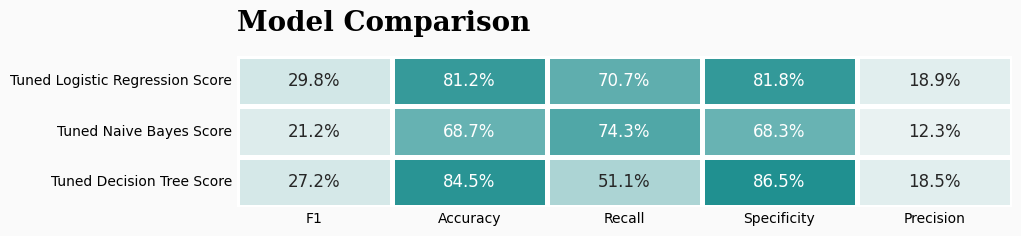

In [31]:
df_models = round(pd.concat([logreg_df, navbayes_df, dectree_df], axis=1),3)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])

sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray) 
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')

fig.show()

> <p style="font-size:18px;font-family:Tahoma;"> <b>Naive Bayes</b> memiliki nilai evaluasi metrik yang paling rendah diantara ketiga jenis klasifikasi dan hanya unggul pada metrik Recall. Oleh karena itu, Naive Bayes dapat memprediksi client non-subscribed dengan baik namun kurang baik dalam memprediksi client yang subscribed.</p>

> <p style="font-size:18px;font-family:Tahoma;"> <b>Decision Tree</b> memiliki nilai Accuracy dan Specificity yang bagus, artinya secara keseluruhan Model ini dapat mengklasifikasi Non-Subscribed dan Subscribed dengan baik. Namun, memiliki nilai Recall yang paling rendah.</p>

> <p style="font-size:18px;font-family:Tahoma;"> <b>Logistic Regression</b> memiliki nilai F1 score paling baik, walaupun nilai metrik lainnya masih kalah dengan model lain, akan tetapi masih diatas threshold penolakan dan dapat diterima</p>

<h1 style="font-family:Tahoma;font-weight:bold"> Conclusion</h1>

<p style="font-size:17px;font-family:Tahoma;"> Diawali dengan proses eksplorasi data didapati datanya banyak terdapat outlier, melakukan feature selection sederhana, menggali insight dengan bantuan visualisasi data. Didapati datanya tidak seimbang dan terdapat data noise berupa nilai "unknown" pada variabel kategorik</p>

<p style="font-size:17px;font-family:Tahoma;"> Setelah itu kita lakukan imputasi pada data noise dengan mengubah nilai nya ke nilai median data. Lalu kita hapus variabel yang tidak terlalu berguna untuk model engineering. Dan yang terakhir kita lakukan Pengkodingan data kategorik menjadi numerik</p>

<p style="font-size:17px;font-family:Tahoma;"> Masuk ke tahap Pemodelan. Saya menggunakan tiga jenis klasifikasi model yaitu Logistic Regression, Naive Bayes, dan Decision Tree. Ketiga model saya lakukan hyperparameter tuning untuk mendapatkan hasil evaluasi metrik yang maksimal. </p>

<p style="font-size:17px;font-family:Tahoma;"> Masuk ke tahap Pemodelan. Saya menggunakan tiga jenis klasifikasi model yaitu Logistic Regression, Naive Bayes, dan Decision Tree. Ketiga model saya lakukan hyperparameter tuning untuk mendapatkan hasil evaluasi metrik yang maksimal. </p>

<p style="font-size:17px;font-family:Tahoma;"> Dari hasil evaluasi metrik, walau Decision Tree memiliki nilai akurasi paling tinggi dan Naive Bayes memiliki nilai recall paling baik, kedua model tersebut memiliki nilai metrik yang sangat rendah di metrik lain.</p>

<p style="font-size:17px;font-family:Tahoma;"> Sementara itu, Logistic Regression memberikan nilai yang konsisten di semua evaluasi metrik, khususnya F1 score yang merupakan bobot rata-rata dari Precision dan Recall. Oleh karena itu, Logistic regression merupakan model yang dipilih untuk proses produksi </p>

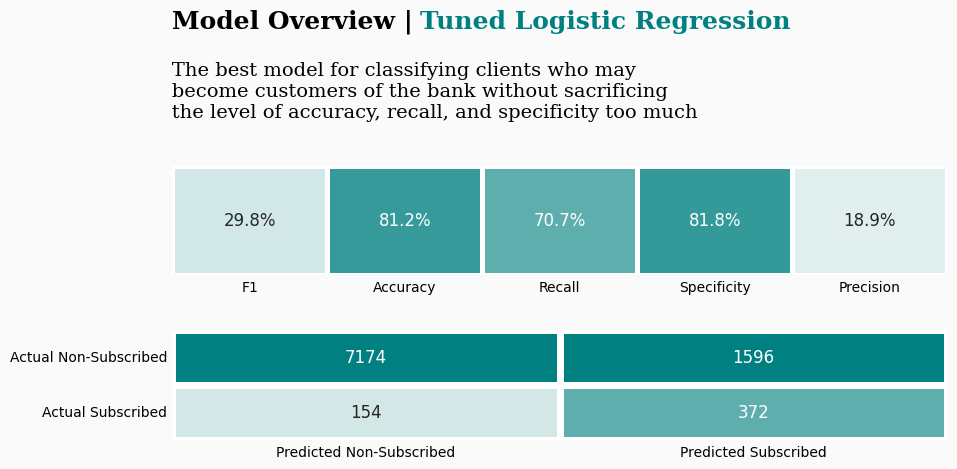

In [32]:
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(10,8), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4,2, wspace=0.1, hspace=0.5)

# allignment
for ax in range(2):
    locals()['axis'+str(ax)] = fig.add_subplot(gs[ax, :])
    locals()['axis'+str(ax)].set_facecolor(Colors.LightGray)
    locals()['axis'+str(ax)].tick_params(axis=u'both', which=u'both',length=0)


# plot
sns.heatmap(logreg_df.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95,yticklabels='', linewidths=2.5,cbar=False,ax=axis0,annot_kws={"fontsize":12})
sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=axis1,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],vmax=500,vmin=0,xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

# text
axis0.text(0,-1.25,'Model Overview |',fontsize=18,fontweight='bold',fontfamily='serif')
axis0.text(1.6,-1.25,'Tuned Logistic Regression',fontsize=18,fontweight='bold',fontfamily='serif', color=Colors.Teal)
axis0.text(-0.45,-0.25,
           '''
           The best model for classifying clients who may 
           become customers of the bank without sacrificing 
           the level of accuracy, recall, and specificity too much
           '''
           ,fontsize=14,fontweight='normal',fontfamily='serif')

fig.show()